In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dataset = dsets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor())

batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [4]:
input_size = 28*28
num_classes = 10
num_epochs = 10
learning_rate = 0.001

total_step = len(train_loader)
print(total_step)

600


In [5]:
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [6]:
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            loss_list.append(loss.item())
            _,predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            acc_list.append(correct/total)
            print('Epoch[{}/{}], Step[{}/{}], Loss: {:.4f}, Train_Acc: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, 
                                                                                      loss.item(), acc_list[-1]))


Epoch[1/10], Step[100/600], Loss: 1.3416, Train_Acc: 0.6800
Epoch[1/10], Step[200/600], Loss: 1.0728, Train_Acc: 0.6800
Epoch[1/10], Step[300/600], Loss: 0.9301, Train_Acc: 0.6700
Epoch[1/10], Step[400/600], Loss: 0.8780, Train_Acc: 0.6875
Epoch[1/10], Step[500/600], Loss: 0.8453, Train_Acc: 0.6920
Epoch[1/10], Step[600/600], Loss: 0.8042, Train_Acc: 0.6983
Epoch[2/10], Step[100/600], Loss: 0.7627, Train_Acc: 0.8000
Epoch[2/10], Step[200/600], Loss: 0.8780, Train_Acc: 0.7550
Epoch[2/10], Step[300/600], Loss: 0.6737, Train_Acc: 0.7633
Epoch[2/10], Step[400/600], Loss: 0.6333, Train_Acc: 0.7775
Epoch[2/10], Step[500/600], Loss: 0.7855, Train_Acc: 0.7680
Epoch[2/10], Step[600/600], Loss: 0.6740, Train_Acc: 0.7717
Epoch[3/10], Step[100/600], Loss: 0.7079, Train_Acc: 0.7300
Epoch[3/10], Step[200/600], Loss: 0.7149, Train_Acc: 0.7350
Epoch[3/10], Step[300/600], Loss: 0.5523, Train_Acc: 0.7667
Epoch[3/10], Step[400/600], Loss: 0.5178, Train_Acc: 0.7900
Epoch[3/10], Step[500/600], Loss: 0.6288

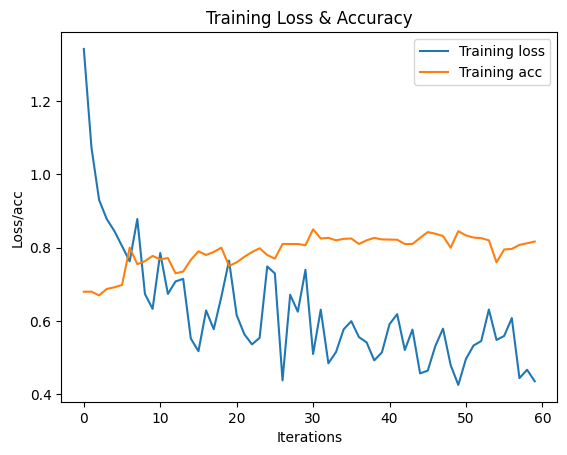

In [7]:
plt.plot(loss_list, label='Training loss')
plt.plot(acc_list, label='Training acc')
plt.xlabel('Iterations')
plt.ylabel('Loss/acc')
plt.title('Training Loss & Accuracy')
plt.legend()
plt.show()

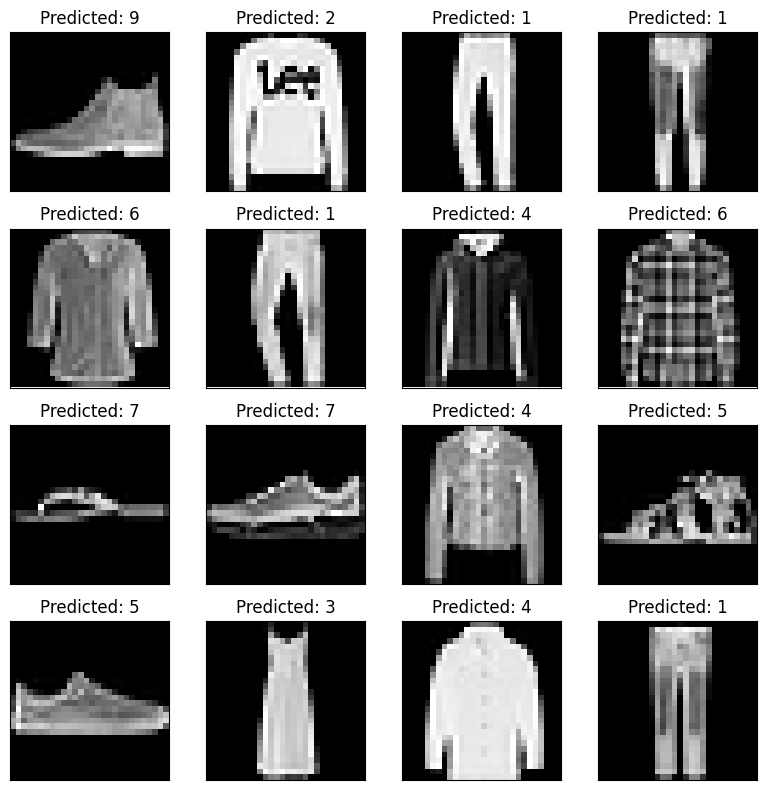

In [15]:
# 이미지 가져오기
dataiter = iter(test_loader)
imgs, labels = dataiter.next()
imgs = imgs.reshape(-1, 28*28)

# 모델 예측
outputs = model(imgs)
_, predicted = torch.max(outputs.data, 1)

# 시각화
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(imgs[i].reshape(28,28)), cmap='gray')
    ax.set_title(f'Predicted: {predicted[i].item()}')
plt.tight_layout()
plt.show()